In [1]:
import pandas as pd
import numpy as np
import os #Interacts with the operating system, e.g. paths, mkdir
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D # Allows ploting in a 3D graph

from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix,classification_report

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


In [2]:
file_path = r'C:/Users/crist/Documents/02.MSU_MsDataScience/2024.SPRING/04.CSIT598_03SP24_MACHINE-LEARNING/02.MACHINE_LEARNING_SP23/PowerPlantsintheU_Export_TableToExcel.xlsx'
df = pd.read_excel(file_path)

In [3]:
# Select columns to analyze
Scolumns = ['State','sector_nam','PrimSource','Install_MW','Total_MW','Longitude','Latitude']

# One-hot encoding
data_encoded = pd.get_dummies(df[Scolumns], columns = ['State','sector_nam'], dtype='int')

data_encoded.head()
                              

,PrimSource,Install_MW,Total_MW,Longitude,Latitude,State_Alabama,State_Alaska,State_Arizona,State_Arkansas,State_California,...,State_West Virginia,State_Wisconsin,State_Wyoming,sector_nam_Commercial CHP,sector_nam_Commercial Non-CHP,sector_nam_Electric Utility,sector_nam_IPP CHP,sector_nam_IPP Non-CHP,sector_nam_Industrial CHP,sector_nam_Industrial Non-CHP
0,hydroelectric,2.3,2.3,-89.6850,45.1786,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
1,hydroelectric,1.3,1.3,-87.7586,45.1136,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
2,natural gas,91.0,79.0,-88.0086,44.5400,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
3,hydroelectric,3.8,3.8,-88.0678,45.2333,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
4,hydroelectric,2.6,2.6,-89.7306,45.4411,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0


In [4]:
X = data_encoded.drop('PrimSource',axis=1)
y = data_encoded['PrimSource']
print("Shape of features (X):", X.shape)
print("Shape of target variable (y):", y.shape)

Shape of features (X): (12008, 63)
Shape of target variable (y): (12008,)


## Scale the data

In [5]:
scaler = MinMaxScaler()

# Fit the scaler to your training data and transform the features
X_scaled = scaler.fit_transform(X)

# Decision Trees

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree Classifier
decision_tree = DecisionTreeClassifier(random_state=42)

# Train the model
decision_tree.fit(X_train, y_train)

# Make predictions
y_pred_dt = decision_tree.predict(X_test)

# Evaluate the model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Accuracy:", accuracy_dt)

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_dt))


Decision Tree Accuracy: 0.6794338051623647
Classification Report:
                precision    recall  f1-score   support

     batteries       0.34      0.33      0.34        57
       biomass       0.33      0.33      0.33       132
          coal       0.33      0.40      0.36        40
    geothermal       0.67      0.33      0.44        18
 hydroelectric       0.64      0.60      0.62       295
   natural gas       0.62      0.67      0.64       402
       nuclear       0.40      0.25      0.31         8
         other       0.38      0.24      0.29        21
     petroleum       0.61      0.55      0.58       186
pumped storage       0.20      0.12      0.15         8
         solar       0.80      0.84      0.82       964
          wind       0.76      0.68      0.72       271

      accuracy                           0.68      2402
     macro avg       0.51      0.45      0.47      2402
  weighted avg       0.68      0.68      0.68      2402



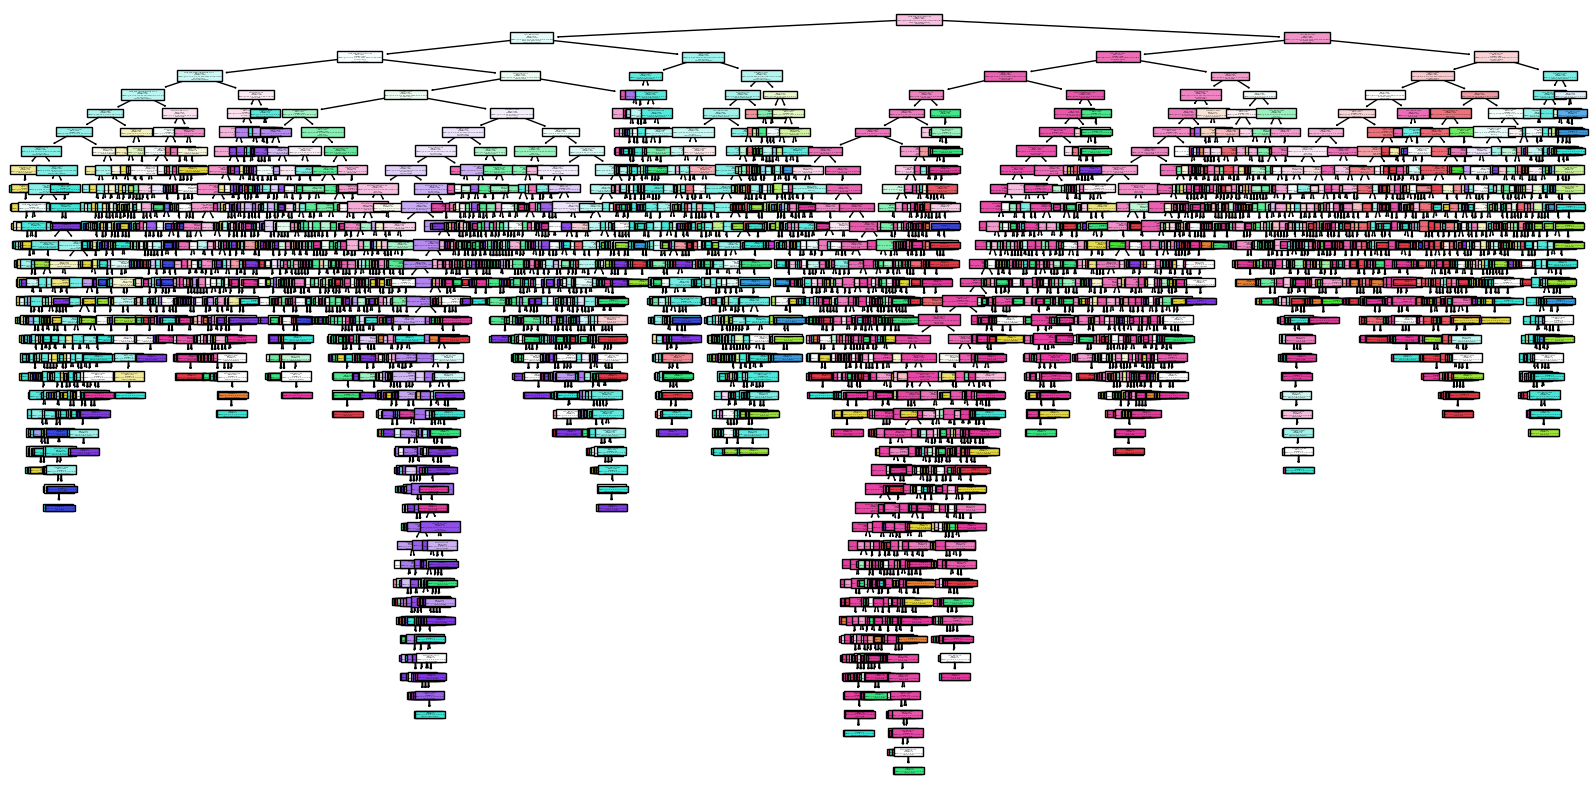

In [7]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Create a decision tree classifier
clf = DecisionTreeClassifier()

# Fit the classifier to your data
clf.fit(X_train, y_train)

# Define feature names and class names lists
feature_names_list = X.columns.tolist() 

# Convert class names to a list
class_names_list = y.unique().tolist()

# Plot the decision tree
plt.figure(figsize=(20, 10))  # Adjust the figure size as needed
plot_tree(clf, filled=True, feature_names=feature_names_list, class_names=class_names_list)
plt.show()


# Random Forest

In [8]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest Classifier
random_forest = RandomForestClassifier(random_state=42)

# Train the model
random_forest.fit(X_train, y_train)

# Make predictions
y_pred_rf = random_forest.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.7531223980016652
Classification Report:
                precision    recall  f1-score   support

     batteries       0.55      0.28      0.37        57
       biomass       0.52      0.33      0.40       132
          coal       0.57      0.40      0.47        40
    geothermal       1.00      0.67      0.80        18
 hydroelectric       0.70      0.68      0.69       295
   natural gas       0.69      0.78      0.73       402
       nuclear       0.33      0.25      0.29         8
         other       0.75      0.29      0.41        21
     petroleum       0.70      0.66      0.68       186
pumped storage       0.00      0.00      0.00         8
         solar       0.82      0.90      0.86       964
          wind       0.81      0.77      0.79       271

      accuracy                           0.75      2402
     macro avg       0.62      0.50      0.54      2402
  weighted avg       0.74      0.75      0.74      2402



### Fit the Random Forest Model

In [9]:
from sklearn.ensemble import RandomForestClassifier

# Instantiate the Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model to your training data
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

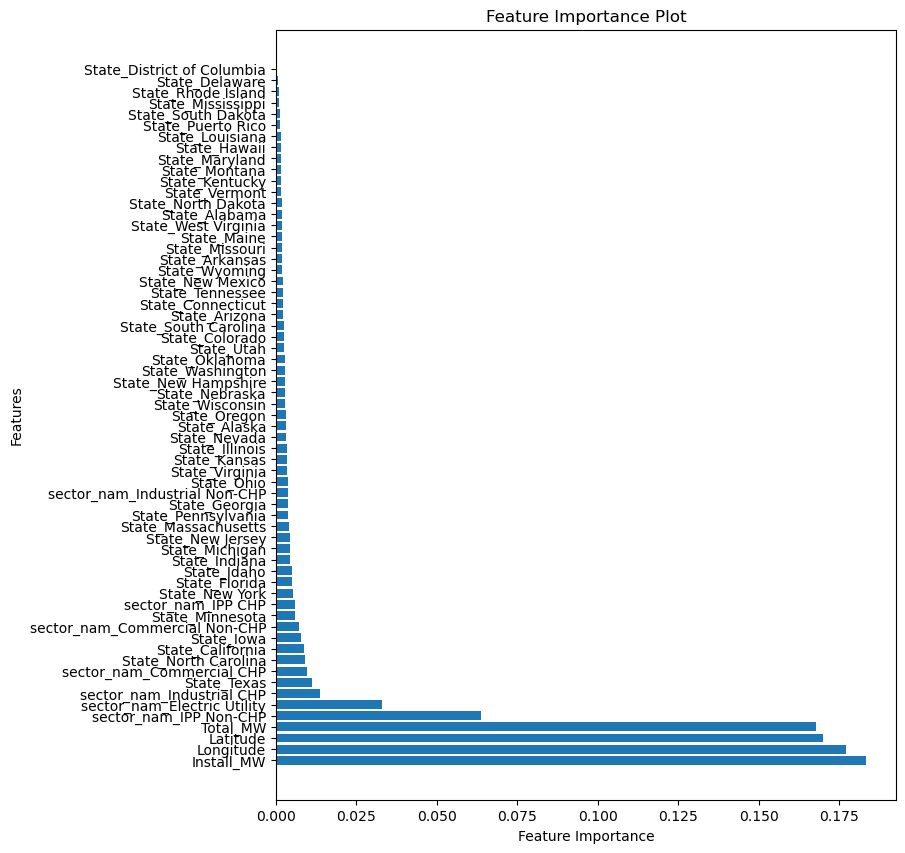

In [10]:
# Access feature importance
feature_importance = rf.feature_importances_

# Sort feature importance in descending order
sorted_indices = np.argsort(feature_importance)[::-1]
sorted_feature_importance = feature_importance[sorted_indices]
sorted_feature_names = X.columns[sorted_indices]

# Plot feature importance
plt.figure(figsize=(8, 10))
plt.barh(range(len(sorted_feature_importance)), sorted_feature_importance, align='center')
plt.yticks(range(len(sorted_feature_importance)), sorted_feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance Plot')
plt.show()


### Permutation Importance

In [11]:
X

,Install_MW,Total_MW,Longitude,Latitude,State_Alabama,State_Alaska,State_Arizona,State_Arkansas,State_California,State_Colorado,...,State_West Virginia,State_Wisconsin,State_Wyoming,sector_nam_Commercial CHP,sector_nam_Commercial Non-CHP,sector_nam_Electric Utility,sector_nam_IPP CHP,sector_nam_IPP Non-CHP,sector_nam_Industrial CHP,sector_nam_Industrial Non-CHP
0,2.3,2.3,-89.685000,45.178600,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
1,1.3,1.3,-87.758600,45.113600,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
2,91.0,79.0,-88.008600,44.540000,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
3,3.8,3.8,-88.067800,45.233300,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
4,2.6,2.6,-89.730600,45.441100,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12003,3.0,3.0,-82.375953,35.380139,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
12004,3.0,3.0,-79.367698,36.009321,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
12005,5.0,5.0,-79.736312,35.273434,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
12006,1.4,1.4,-73.910480,42.876570,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


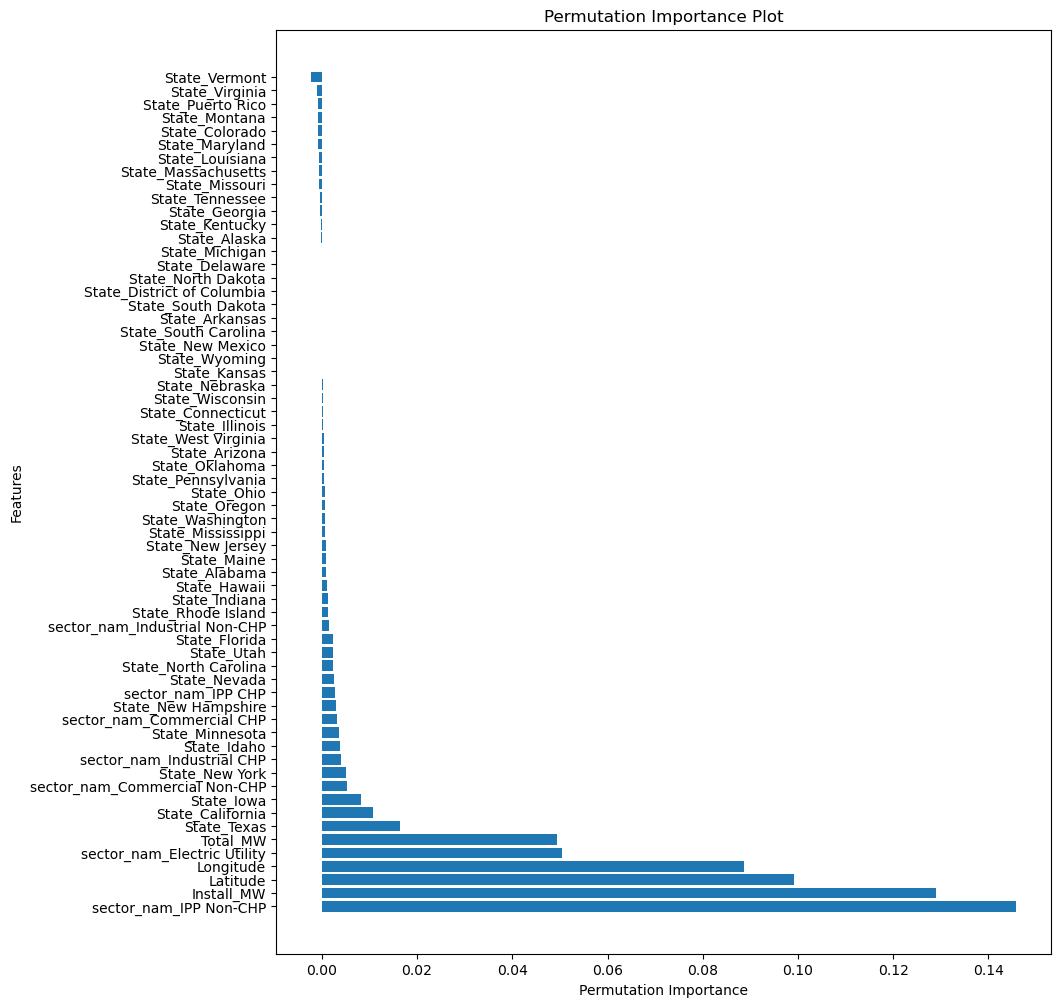

In [12]:
from sklearn.inspection import permutation_importance

# Compute permutation importance
perm_importance = permutation_importance(rf, X_test, y_test)
sorted_indices = np.argsort(perm_importance.importances_mean)[::-1]

# Plot permutation importance
plt.figure(figsize=(10, 12))
plt.barh(range(len(sorted_indices)), perm_importance.importances_mean[sorted_indices], align='center')
plt.yticks(range(len(sorted_indices)), X.columns[sorted_indices])
plt.xlabel('Permutation Importance')
plt.ylabel('Features')
plt.title('Permutation Importance Plot')
plt.show()


### Partial Dependence Plots

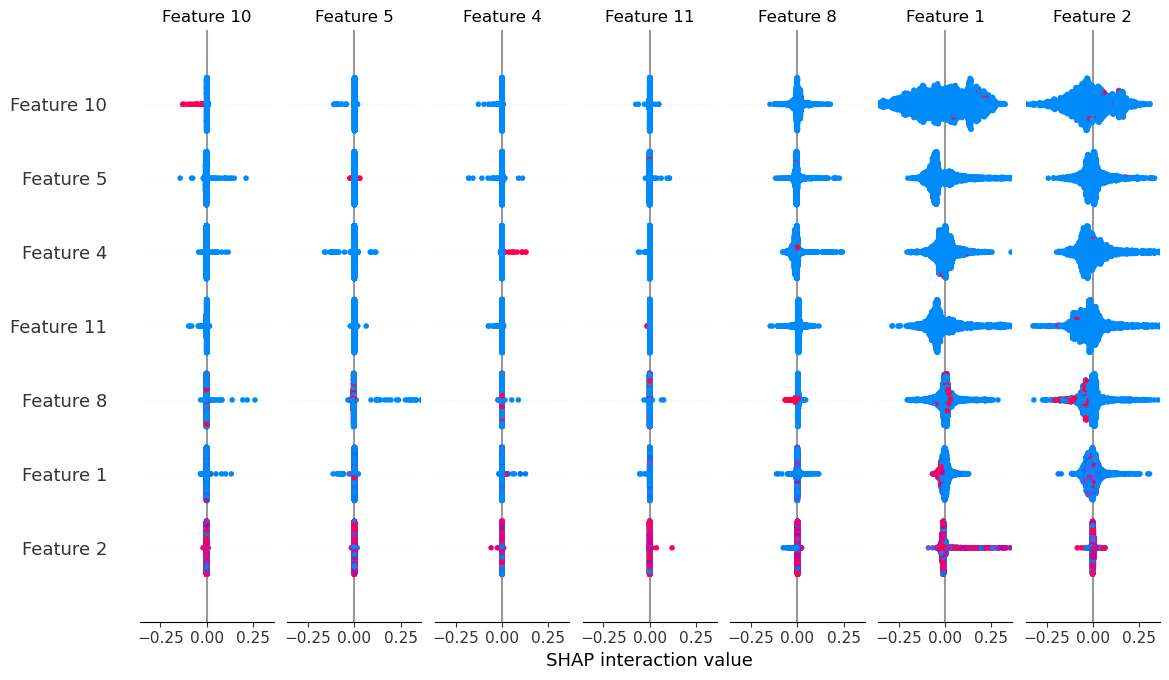

In [18]:
import shap

# Calculate SHAP values
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test)

# Summary plot
shap.summary_plot(shap_values, X_test)


# KNN

In [20]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors (k) as needed

# Train the model
knn.fit(X_train, y_train)

# Make predictions
y_pred_knn = knn.predict(X_test)

# Evaluate the model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("KNN Accuracy:", accuracy_knn)

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_knn))


KNN Accuracy: 0.7027477102414654
Classification Report:
                precision    recall  f1-score   support

     batteries       0.34      0.26      0.30        57
       biomass       0.37      0.22      0.28       132
          coal       0.41      0.40      0.41        40
    geothermal       0.71      0.56      0.62        18
 hydroelectric       0.63      0.72      0.67       295
   natural gas       0.67      0.64      0.65       402
       nuclear       1.00      0.12      0.22         8
         other       0.67      0.10      0.17        21
     petroleum       0.64      0.62      0.63       186
pumped storage       0.00      0.00      0.00         8
         solar       0.78      0.86      0.82       964
          wind       0.77      0.73      0.75       271

      accuracy                           0.70      2402
     macro avg       0.58      0.44      0.46      2402
  weighted avg       0.69      0.70      0.69      2402



In [21]:
# Encode class labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_encoded

array([ 4,  4,  5, ..., 10, 10, 10])

# Pytorch

In [22]:
import torch
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split

# Convert features and target variable to PyTorch tensors
X_tensor = torch.tensor(X_scaled, dtype=torch.float32)
y_tensor = torch.tensor(y_encoded, dtype=torch.long)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tensor, y_tensor, test_size=0.2, random_state=42)

# Create data loaders
train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)

batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

In [23]:
# Check the shapes
print("Shape of features (X_tensor):", X_tensor.shape)
print("Shape of target variable (y_tensor):", y_tensor.shape)

Shape of features (X_tensor): torch.Size([12008, 63])
Shape of target variable (y_tensor): torch.Size([12008])


In [24]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

# Assuming X_tensor and y_tensor are your torch tensors

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tensor, y_tensor, test_size=0.2, random_state=42)

# Define the model architecture
class Model(nn.Module):
    def __init__(self, input_size, num_classes):
        super(Model, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, num_classes)
        self.relu = nn.ReLU()
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return self.softmax(x)

# Initialize the model
input_size = X_train.shape[1]
num_classes = len(np.unique(y_train))
model = Model(input_size, num_classes)

# Define hyperparameters
learning_rate = 0.001
num_epochs = 20
batch_size = 128

# Define loss function
criterion = nn.CrossEntropyLoss()

# Define optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Create DataLoader for training
train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# Training loop
for epoch in range(num_epochs):
    for i, (inputs, labels) in enumerate(train_loader):
        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        
        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(train_loader)}], Loss: {loss.item():.4f}')

# Evaluation
with torch.no_grad():
    outputs = model(X_test)
    _, predicted = torch.max(outputs, 1)
    accuracy = accuracy_score(y_test.numpy(), predicted.numpy())
    print(f'Accuracy on test set: {accuracy:.2f}')


Accuracy on test set: 0.62


In [25]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

# Assuming X_tensor and y_tensor are your torch tensors

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tensor, y_tensor, test_size=0.2, random_state=42)

# Define the model architecture
class Model(nn.Module):
    def __init__(self, input_size, num_classes):
        super(Model, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, num_classes)
        self.relu = nn.ReLU()
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return self.softmax(x)

# Initialize the model
input_size = X_train.shape[1]
num_classes = len(np.unique(y_train))
model = Model(input_size, num_classes)

# Define hyperparameters
learning_rate = 0.001
num_epochs = 20
batch_size = 128

# Define loss function
criterion = nn.CrossEntropyLoss()

# Define optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Create DataLoader for training
train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# Training loop
for epoch in range(num_epochs):
    for i, (inputs, labels) in enumerate(train_loader):
        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        
        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(train_loader)}], Loss: {loss.item():.4f}')

# Evaluation
with torch.no_grad():
    outputs = model(X_test)
    _, predicted = torch.max(outputs, 1)
    accuracy = accuracy_score(y_test.numpy(), predicted.numpy())
    print(f'Accuracy on test set: {accuracy:.2f}')


Accuracy on test set: 0.63
